In [1]:
import pandas as pd
import numpy as np
import itertools
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import pickle 

In [6]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [7]:
df = pd.read_csv('fake_or_real_news.csv')

In [8]:
y = df.label

In [9]:
df = df.drop('label', axis=1)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], y, test_size=0.33, random_state=53)

In [11]:
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)

In [12]:
print(count_test)

  (0, 2385)	1
  (0, 3184)	1
  (0, 4067)	1
  (0, 4919)	1
  (0, 5460)	2
  (0, 7383)	1
  (0, 7422)	1
  (0, 7464)	1
  (0, 10525)	1
  (0, 10673)	2
  (0, 10984)	1
  (0, 10985)	2
  (0, 12457)	1
  (0, 12601)	1
  (0, 13343)	1
  (0, 14163)	1
  (0, 14446)	1
  (0, 14867)	1
  (0, 15085)	1
  (0, 15285)	1
  (0, 15812)	1
  (0, 15870)	1
  (0, 15942)	2
  (0, 16027)	4
  (0, 16580)	1
  :	:
  (2090, 52119)	1
  (2090, 52134)	2
  (2090, 52193)	3
  (2090, 52290)	1
  (2090, 52661)	1
  (2090, 52926)	2
  (2090, 52948)	1
  (2090, 53308)	1
  (2090, 53607)	1
  (2090, 53792)	4
  (2090, 54120)	1
  (2090, 54171)	1
  (2090, 54393)	2
  (2090, 54647)	5
  (2090, 54699)	1
  (2090, 54746)	1
  (2090, 54822)	3
  (2090, 54850)	1
  (2090, 54936)	2
  (2090, 55614)	1
  (2090, 55764)	2
  (2090, 55773)	1
  (2090, 55858)	1
  (2090, 56196)	1
  (2090, 56512)	1


In [13]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [14]:
clf = RandomForestClassifier(n_estimators=100) 
filename = 'randomforestmodel.sav'
pickle.dump(clf, open(filename, 'wb'))

accuracy:   0.904
Confusion matrix, without normalization


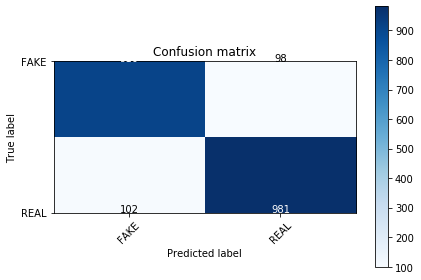

In [15]:
clf.fit(count_train, y_train)
pred = clf.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])